In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing


In [39]:
log_line_data = None
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b")
# with (open(f"{os.getcwd()}/wc_day73_1.log", mode='r') as f1,
#         open(f"{os.getcwd()}/wc_day73_2.log", mode='r') as f2,
#         open(f"{os.getcwd()}/wc_day73_3.log", mode='r') as f3,
#         open(f"{os.getcwd()}/wc_day73_4.log", mode='r') as f4,
#         open(f"{os.getcwd()}/wc_day73_5.log", mode='r') as f5,
#         open(f"{os.getcwd()}/wc_day73_6.log", mode='r') as f6,
#         open(f"{os.getcwd()}/wc_day74_1.log", mode='r') as f7):
#     log_line_data = [line_parser(line) for line in f1.readlines() + f2.readlines() + f3.readlines() + f4.readlines() + f5.readlines() + f6.readlines() + f7.readlines()]
with open(f"{os.getcwd()}/wc_day73_3.log", mode='r') as f1:
    f1.readlines()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 7244: invalid start byte

In [26]:
df_log_line_data = pd.DataFrame([{"date": df_line["time_received_datetimeobj"], "count": 1} for df_line in log_line_data])
df_log_line_data

,date,count
0,1998-07-07 21:30:09,1
1,1998-07-07 21:30:09,1
2,1998-07-07 21:30:09,1
3,1998-07-07 21:30:09,1
4,1998-07-07 21:30:09,1
...,...,...
4874282,1998-07-07 22:00:00,1
4874283,1998-07-07 22:00:00,1
4874284,1998-07-07 22:00:00,1
4874285,1998-07-07 22:00:00,1


In [27]:
df_S = df_log_line_data.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index()
df_S

,date,count
0,1998-07-07 21:30:09,178
1,1998-07-07 21:30:10,2870
2,1998-07-07 21:30:11,2944
3,1998-07-07 21:30:12,3052
4,1998-07-07 21:30:13,2998
...,...,...
1787,1998-07-07 21:59:56,194
1788,1998-07-07 21:59:57,85
1789,1998-07-07 21:59:58,88
1790,1998-07-07 21:59:59,87


In [30]:
df_S.to_csv(f"{os.getcwd()}/wc_day73.csv")

In [28]:
df_S_date = df_S["date"].array.reshape(-1, 1)
df_S_count = df_S["count"].array.reshape(-1, 1)

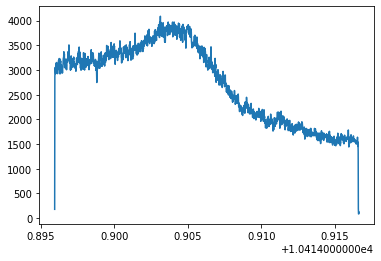

In [29]:
plt.plot(df_S_date, df_S_count)